#### 1.Import required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#### 2.Import the dataset

In [2]:
data = pd.read_excel('iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### 3.EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.shape

(150, 5)

In [6]:
data['Classification'].nunique()

3

In [7]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [8]:
#statistics of data
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
#correlation between columns
data.corr()

,SL,SW,PL,PW
SL,1.000000,-0.102511,0.873444,0.821584
SW,-0.102511,1.000000,-0.428465,-0.346900
PL,0.873444,-0.428465,1.000000,0.961679
PW,0.821584,-0.346900,0.961679,1.000000


In [10]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

#### 4.Datapreprocessing
#### split dataset into categorical and numerical

In [12]:
num_cols = data[['SL', 'SW', 'PL', 'PW']]

In [13]:
num_cols.isna().sum()

SL    7
SW    6
PL    6
PW    0
dtype: int64

In [14]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,NaN,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,NaN,2.0
148,6.2,3.4,5.4,2.3


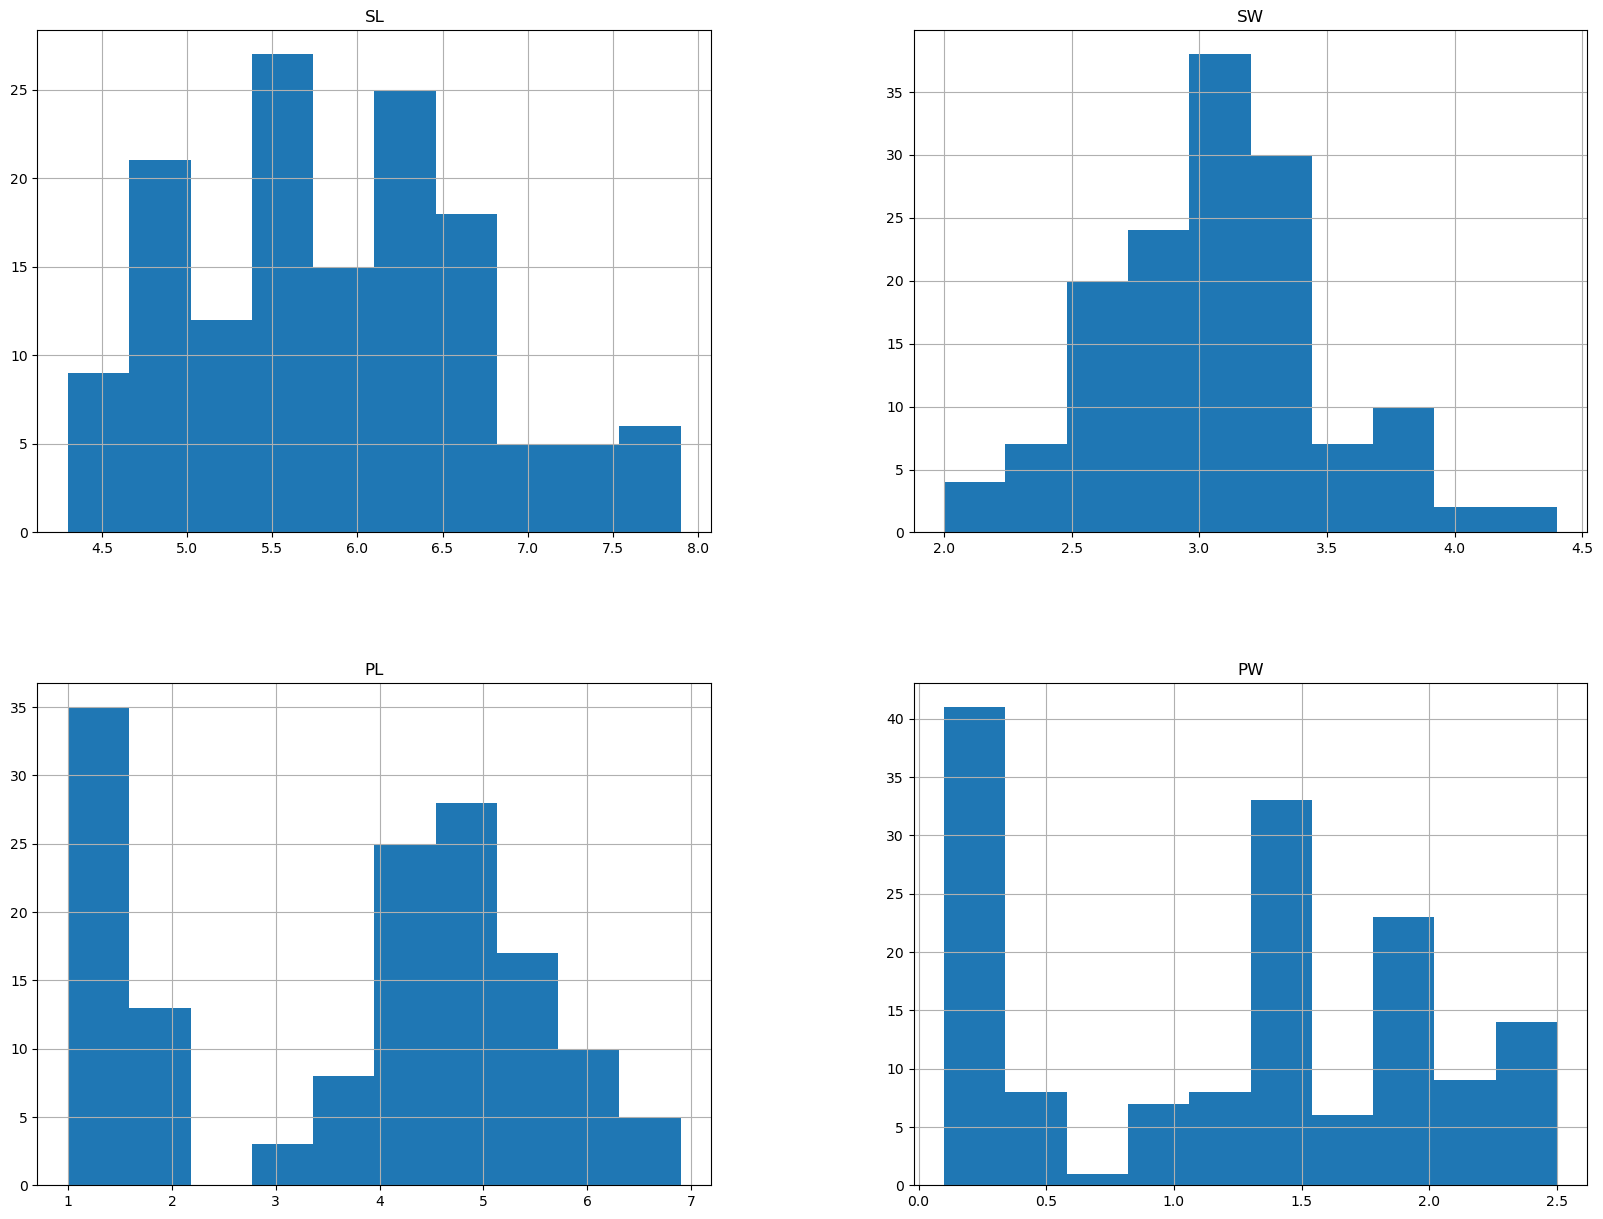

In [15]:
freqgraph.hist(figsize=(20,15))
plt.show()

In [16]:
category_data = data.select_dtypes(include=['object'])
category_data

,Classification
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


#### All the null value should be filled with median values as it is skewed data

In [17]:
for col in['SL', 'SW', 'PL']:
    data[col] = data[col].fillna(data[col].median())

In [18]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [19]:
org_data=data.copy()

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


#### Managing outliers

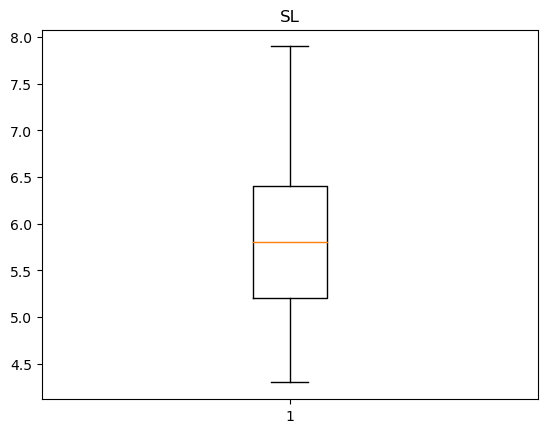

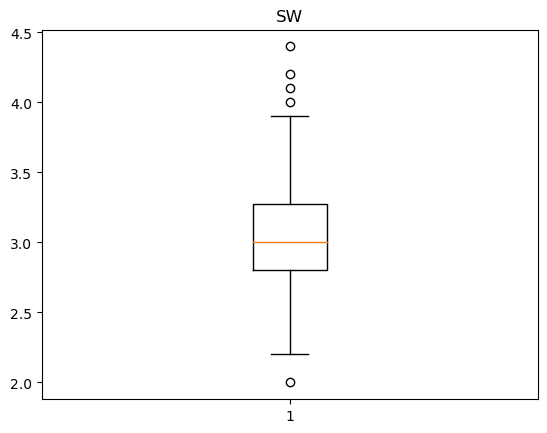

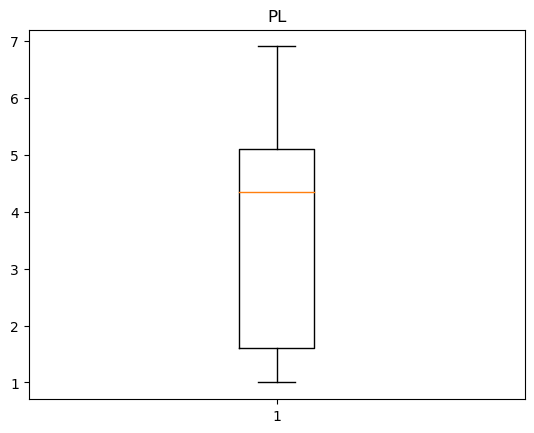

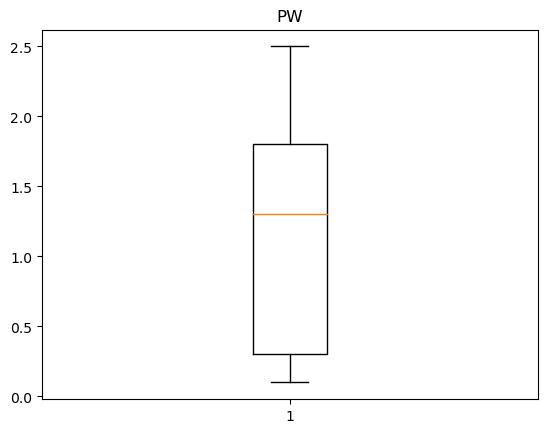

In [23]:
for i in ['SL', 'SW', 'PL', 'PW']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

#### remove outliers of SW

In [24]:
IQR=stats.iqr(data.SW,interpolation='midpoint')
IQR

0.4500000000000002

In [25]:
Q1=data.SW.quantile(0.25)
Q3=data.SW.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(2.1249999999999996, 3.95)

In [26]:
data.loc[data.SW>max_limit]

,SL,SW,PL,PW,Classification
14,5.8,4.0,1.2,0.2,0
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0


In [27]:
data.loc[data.SW<min_limit]

,SL,SW,PL,PW,Classification
60,5.0,2.0,3.5,1.0,1


In [28]:
data.loc[data['SW']>max_limit,'SW']=np.median(data.SW)

In [30]:
data.loc[data.SW>max_limit]

,SL,SW,PL,PW,Classification


In [31]:
data.loc[data['SW']<min_limit,'SW']=np.median(data.SW)

In [32]:
data.loc[data.SW<min_limit]

,SL,SW,PL,PW,Classification


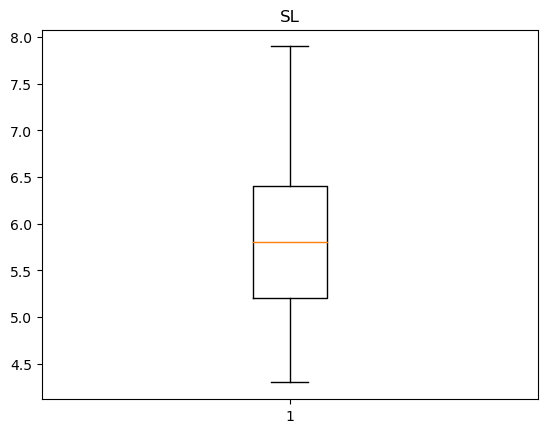

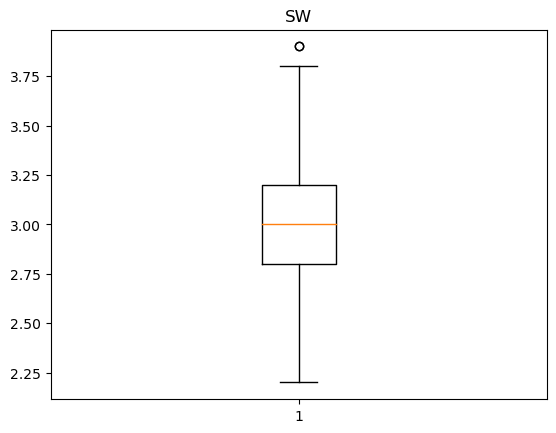

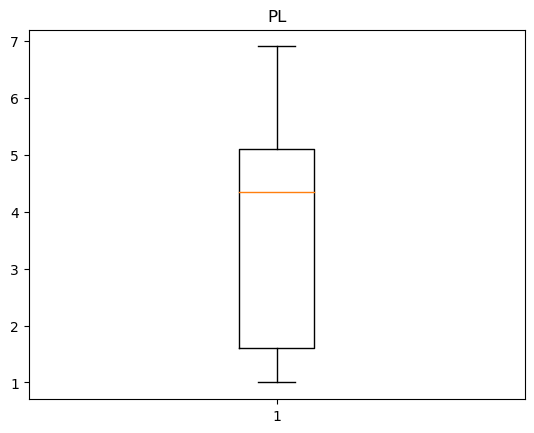

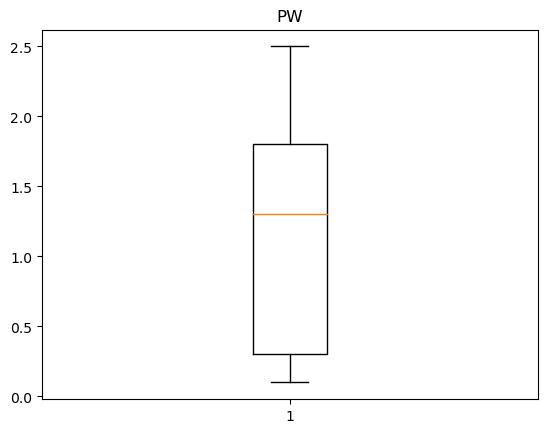

In [33]:
for i in ['SL', 'SW', 'PL', 'PW']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

[]

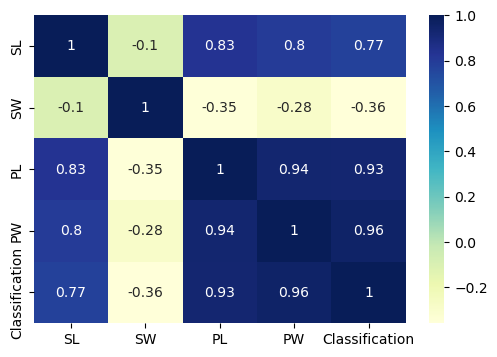

In [34]:
# correlation matrix
corr_matrix=data.corr()
plt.subplots(figsize=(6,4))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.plot()

#### 5.Modelling

In [35]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

#### Splitting the dataset into the Training set and Test set

In [37]:
x=data.drop(['Classification'],axis=1)
y=data['Classification']

In [112]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = 0.2 )

In [120]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### Logistic Regression model

In [121]:
##### Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='lbfgs', multi_class='auto')
log_model = log_model.fit(x_train, y_train)

In [123]:
# Predicting the Test set results
y_pred = log_model.predict(x_test)

In [124]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score


In [126]:
# Making the Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

#### Note: Sci-Kit learn is using a default threshold 0.5 for binary classifications

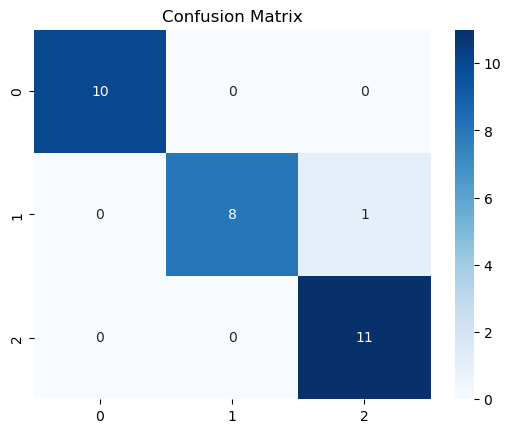

In [129]:
# Plot confusion matrix
# confusion matrix sns heatmap 
ax = plt.axes()
sns.heatmap(cm, annot=True,fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [132]:
print('Accuracy =',accuracy_score(y_test,y_pred))
print('Precision =',precision_score(y_test,y_pred,average='micro'))
print('Recall =',recall_score(y_test,y_pred,average='micro'))
print('F1 Score =',f1_score(y_test,y_pred,average='micro'))

Accuracy = 0.9666666666666667
Precision = 0.9666666666666667
Recall = 0.9666666666666667
F1 Score = 0.9666666666666667


#### K Nearest Neighbours Model

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
print(x_train.shape)
print(x_test.shape)

(120, 4)
(30, 4)


In [61]:
print(y_train.shape)
print(y_test.shape)

(120,)
(30,)


In [99]:
#Calculating the accuracy

acc = accuracy_score(y_test,y_predictions)
print(acc)

0.9666666666666667


In [104]:
#Finding the optimum value of k
metric_k = []
neighbors = np.arange(1,25)

In [105]:
#euclidean distance
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'euclidean')
    classifier.fit(x_train,y_train)
    y_predictions = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

In [102]:
metric_k

[0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

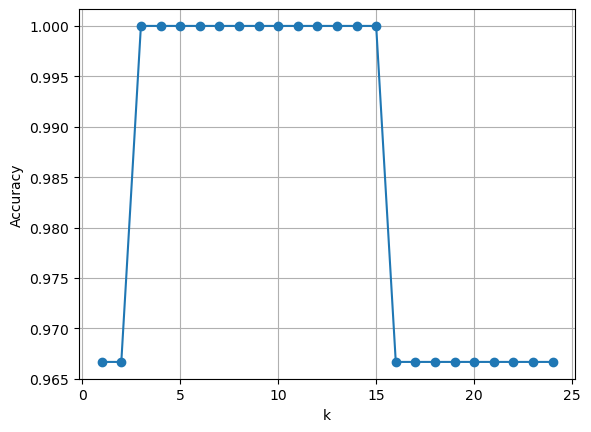

In [106]:
#plot the relationship between K and the testing accuracy
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

In [107]:
classifier = KNeighborsClassifier(n_neighbors = 5,metric = 'euclidean')
classifier.fit(x_train,y_train)
y_predictions = classifier.predict(x_test)

In [133]:
print('Accuracy =',accuracy_score(y_test,y_predictions))
print('Precision =',precision_score(y_test,y_predictions,average='micro'))
print('Recall =',recall_score(y_test,y_predictions,average='micro'))
print('F1 Score =',f1_score(y_test,y_predictions,average='micro'))


Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F1 Score = 1.0


In [134]:
confusion_matrix(y_test,y_predictions)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

#### Conclusion

In [ ]:
From above classification models,KNN model is better than Logistic Regression model as the accuracy is more in KNN.